In [168]:
import nltk as nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from wordcloud import WordCloud as wc

In [169]:
data = pd.read_csv(r'C:\Users\Administrator\Desktop\unstructured elective\dataset\K8 Reviews v0.2.csv')

In [170]:
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [171]:
data.shape

(14675, 2)

In [172]:
data.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

##### get the word cloud
    1. combine all the reviews into a single string
    2. instantiate word cloud
    3. generate the word cloud

In [173]:
reviews = data[['review']]

In [174]:
reviews_combined = ' '.join(reviews['review'].values)

In [175]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [176]:
word_cloud = wc().generate(reviews_combined)

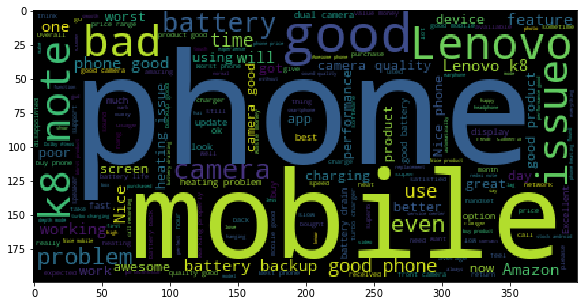

In [177]:
plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.show()

In [178]:
word_cloud= wc(width = 1920,height = 1080, background_color ='white',max_words =150,mode = 'RGB').generate(reviews_combined)

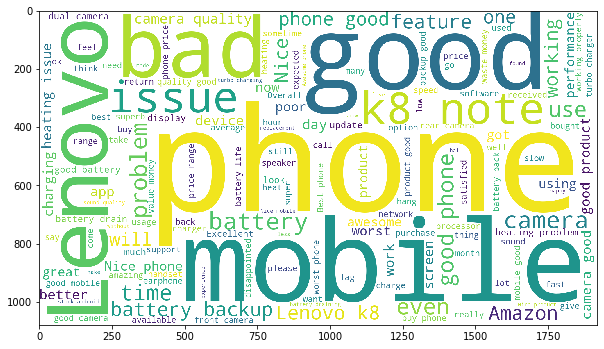

In [179]:
plt.figure(figsize = (10,10))
plt.imshow(word_cloud)
plt.show()

### Bar graph of top 25 used words
    1. get the words and the frequencies
    2. sort based on frequencies and get the top 25 words
    3. plot the bar graph

In [180]:
reviews['count'] = reviews['review'].apply(lambda x: len(str(x).split(" ")))

In [181]:
# Cleaning the data --> removing punctuation , numbers,converting everything to lowercase
reviews['clean_text'] = reviews['review'].str.lower().str.replace('[^a-z ]','')
reviews

,review,count,clean_text
0,Good but need updates and improvements,6,good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr...",90,worst mobile i have bought ever battery is dra...
2,when I will get my 10% cash back.... its alrea...,12,when i will get my cash back its already jan...
3,Good,1,good
4,The worst phone everThey have changed the last...,27,the worst phone everthey have changed the last...
...,...,...,...
14670,"I really like the phone, Everything is working...",15,i really like the phone everything is working ...
14671,The Lenovo K8 Note is awesome. It takes best p...,46,the lenovo k note is awesome it takes best pic...
14672,Awesome Gaget.. @ this price,5,awesome gaget this price
14673,This phone is nice processing will be successf...,18,this phone is nice processing will be successf...


In [200]:
stop = set(stopwords.words('english'))

# if you want to extend the stopword list
# stop.extend(['use','im'])
def stopword(text):
    text = [word for word in text.split() if word not in stop]
    # joining the list of words with space seperator
    return "  ".join(text)
reviews['split_words']= reviews['clean_text'].apply(stopword)
reviews.head()

,review,count,clean_text,split_words
0,Good but need updates and improvements,6,good but need updates and improvements,good need updates improvements
1,"Worst mobile i have bought ever, Battery is dr...",90,worst mobile i have bought ever battery is dra...,worst mobile bought ever battery draining...
2,when I will get my 10% cash back.... its alrea...,12,when i will get my cash back its already jan...,get cash back already january
3,Good,1,good,good
4,The worst phone everThey have changed the last...,27,the worst phone everthey have changed the last...,worst phone everthey changed last phone ...


In [201]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [202]:
count_vectorizer.fit(reviews['split_words'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [203]:
dictionary = count_vectorizer.vocabulary_.items()

In [204]:
# term-document matrix
dtm = count_vectorizer.fit_transform(reviews['split_words'])
dtm

<14675x16721 sparse matrix of type '<class 'numpy.int64'>'
	with 154386 stored elements in Compressed Sparse Row format>

In [199]:
DTM = pd.DataFrame(dtm.toarray(),columns = count_vectorizer.get_feature_names())
DTM.head(10)

MemoryError: Unable to allocate array with shape (14675, 16721) and data type int64

In [43]:
word_count =DTM.sum()
word_count

aa         8
aab        1
aachha     1
aachi      1
aadhe      1
          ..
zoomed     2
zooming    8
zooms      1
zoomso     1
zuk        2
Length: 16721, dtype: int64

In [44]:
Word_table = pd.DataFrame(word_count).reset_index()
Word_table = Word_table.rename(columns= {'index':'Word', 0:'Freq'})
Word_table.sort_values(by='Freq',ascending =False,inplace =True)
top10_word= Word_table.head(25)

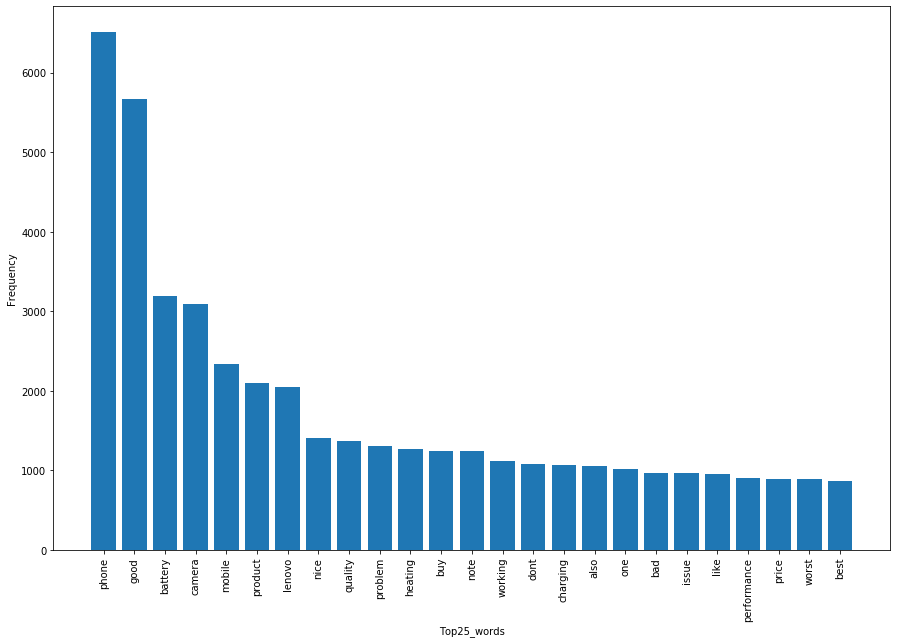

In [47]:
plt.figure(figsize=(15,10))
plt.bar(top10_word['Word'],top10_word['Freq'])
plt.xlabel('Top25_words')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [61]:
reviews = data['review'].apply(stopword)
reviews = reviews.reset_index().drop('index',axis=1)
reviews_combine = ' '.join(reviews['review'].values)

In [62]:
wordlist = reviews_combine.split(' ')
from collections import Counter
word_dict = Counter(wordlist)

In [63]:
words_df = pd.DataFrame(word_dict,index = np.arange(0,1,1))

In [64]:
words_df = words_df.T

In [65]:
words_df.reset_index(inplace=True)

In [66]:
words_df.columns= ['words','word_count']

In [67]:
import seaborn as sb

words_df.sort_values(by = 'word_count',ascending= False,inplace=True)

top_25_df = words_df.head(25)
top_25_df.drop([1],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


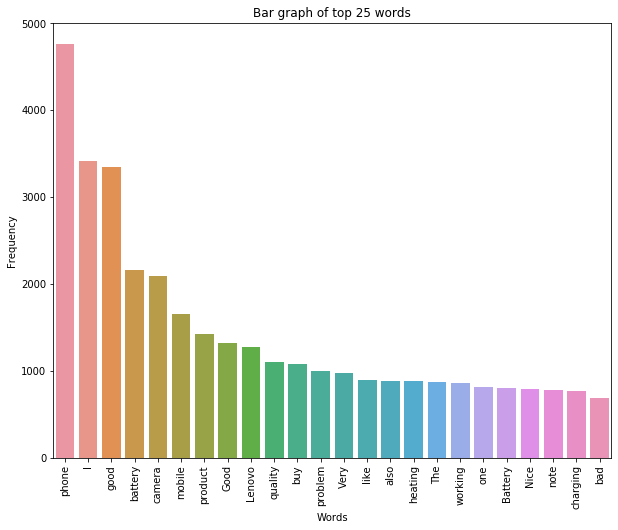

In [68]:
plt.figure(figsize=(10,8))
sb.barplot(top_25_df['words'],top_25_df['word_count'])
plt.xticks(rotation = 90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Bar graph of top 25 words')
plt.show()

Problem with tese visuals:
    1. too many distinct words in the corpus of reviews
    2. test is non uniform case
    2.punctuations present in the text
    3.there are languages connectors in the text - stop words
    4.words with different forms / tenses - charge, charged charginf

#### Text processing:
        1.text cleaning
        2.ge the visuals - word cloud and bar graph or frequency graph
        3.converting the text to number matrices
        4.advanced visuals using collections (n-grams)

In [69]:
from nltk.tokenize import word_tokenize

In [70]:
all_terms = word_tokenize(reviews_combined)

In [71]:
print(len(all_terms),len(reviews_combine))

324523 1484758


### Frequency distribution of words

In [72]:
from nltk.probability import FreqDist

In [73]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13820, 'is': 10222, ',': 6890, 'phone': 5939, 'the': 5590, 'not': 5294, 'and': 5147, 'to': 4635, 'it': 4265, 'good': 4260, ...})

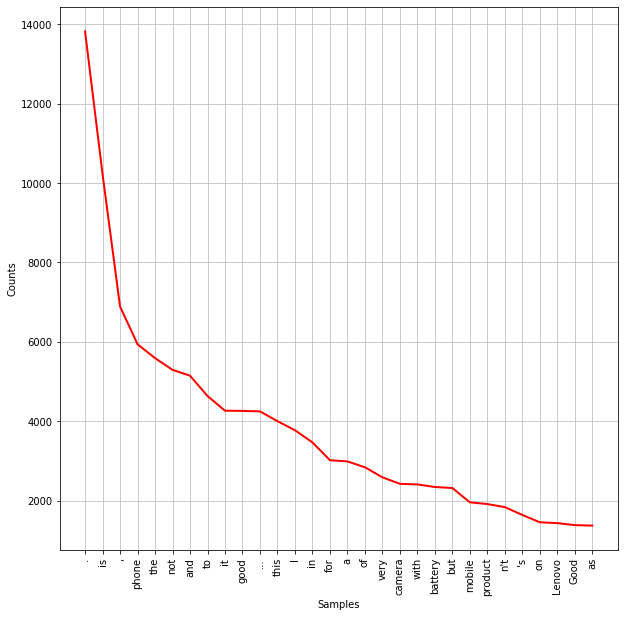

In [74]:
plt.figure(figsize=(10,10))
fdist.plot(30,cumulative=False,color='red')
plt.show()

In [75]:
from string import punctuation
from nltk.corpus import stopwords

In [76]:
stop_nltk = stopwords.words("english")

In [77]:
stop_updated = stop_nltk + ["...",".."] +\
["mobile","phone","lenovo","k8","note","n't"]

In [78]:
reviews_updated   = [term for term in all_terms if term not in stop_updated and term not in list(punctuation) and len(term)>2]

In [107]:
print(reviews_updated)

['Good', 'need', 'updates', 'improvements', 'Worst', 'bought', 'ever', 'Battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.This', 'biggest', 'lie', 'Amazon', 'Lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000MAH', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.Do', 'know', 'Lenovo', 'survive', 'making', 'full', 'us.Please', 'else', 'regret', 'like', 'get', 'cash', 'back', 'already', 'January..', 'Good', 'The', 'worst', 'everThey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', '.Highly', 'disappointing', 'amazon', 'Only', 'telling', 'buyI', 'totally', 'disappointedPoor', 'batteryPoor', 'cameraWaste', 'money', 'Phone', 'awesome', 'But', 'charging', 'heats', 'allot..Really', 'genuine', 'reason', 'hate', 'Lenovo', 'The', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'Lenovo', 'service', 'station', 'Ahmedabad', 'one', 'years', 'warra

In [108]:
print(len(set(reviews_updated)))

21569


## Stemming

In [109]:
from nltk.stem import PorterStemmer, SnowballStemmer

In [110]:
stemmer_p = PorterStemmer()
snow_stem = SnowballStemmer('english')

In [111]:
P_stemmed_list = [stemmer_p.stem(word) for word in reviews_updated]
snow_stemmed_list = [snow_stem.stem(word) for word in reviews_updated]

In [112]:
print(len(set(P_stemmed_list)))

16269


In [113]:
print(len(set(snow_stemmed_list)))

16183


## Lemmatization

In [114]:
from nltk.stem import WordNetLemmatizer

In [115]:
lemm = WordNetLemmatizer()

In [116]:
lemmatized_list = [lemm.lemmatize(word) for word in [i.lower() for i in reviews_updated]]

In [117]:
print(len(set(lemmatized_list)))

17942


In [118]:
print('Original: ',len(set(reviews_updated)),'stemming_porter:',len(set(P_stemmed_list)),'Stemming_snowball:',len(set(snow_stemmed_list)),'Lemmatization:',len(set(lemmatized_list)),sep='\n')

Original: 
21569
stemming_porter:
16269
Stemming_snowball:
16183
Lemmatization:
17942


- Stemmer reduces the number of distinct words in the corpus to a greater extent

### lets build a UDF(user defined function)
       -> input :review
       -> tasks : all the above cleaning steps
       ->return : cleaned reviews
   Based on the outcome of this function, you should be able to add a new column in the data frame called as "cleaned_reviews"

In [91]:
def clean_text(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [snow_stem.stem(term) for term in tokens if term not in stop_updated and \
               term not in list(punctuation) and\
               len(term) >2]
    res = " ".join(stemmed)
    return res

In [92]:
data['clean_review'] = data.review.apply(clean_text)

In [93]:
data.head(10)

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...
5,0,Only I'm telling don't buyI'm totally disappoi...,tell buyi total disappointedpoor batterypoor c...
6,1,"Phone is awesome. But while charging, it heats...",awesom charg heat allot..r genuin reason hate
7,0,The battery level has worn down,batteri level worn
8,0,It's over hitting problems...and phone hanging...,hit problem hang problem servic station ahmeda...
9,0,A lot of glitches dont buy this thing better g...,lot glitch dont buy thing better option


In [144]:
def clean_text_lemma(sent):
    tokens = word_tokenize(sent.lower())
    lemmaa = [lemm.lemmatize(term) for term in tokens if term not in stop_updated and \
               term not in list(punctuation) and\
               len(term) >2]
    res = " ".join(lemmaa)
    return res

In [129]:
data['clean_review_lemma'] = data.review.apply(clean_text_lemma)

In [146]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [149]:
doc1_clean = data.review.apply(clean_txt)
len(doc1_clean)

14675

In [162]:
count_vect_bg = CountVectorizer()

In [163]:
X_bg = count_vect_bg.fit_transform(doc1_clean)
X_bg.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [164]:
DTM_bg = pd.DataFrame(X_bg.toarray(),columns=count_vect_bg.get_feature_names())
DTM_bg

,00,000,000000000,000mah,01,01_04_2018,02,02may,03,04,...,இல,என,ஏற,ஒன,கவ,பரம,பலம,ரண,றப,லல
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
